Copyright (c) 2017, Hiori Kino

All rights reserved.

This software is released under the BSD License (3-clause BSD License). 

# hierarchical/agglomerative clustering

ref. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

hierarchical clustering

1. define 'distance' and calculate pair distance
1. make pairs in the order of distance

comment: 
* There are many defintions of 'distance' 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html


* There are many measures of distances in the upper branches 
ref.
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

# E.g., defintions of distances

* euclidean   $ \sqrt{ \sum_i ||u_i-v_i||_2 } $
* Manhattan $\sum_i ||u_i-v_i||_1$
* cosine $1−(u,v)/(||u||_2||v||_2)$


ref. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

* earth mover's distance 

ref. https://en.wikipedia.org/wiki/Earth_mover%27s_distance



In [1]:
import pandas as pd
df0 = pd.read_csv("Maeda_carbon8_descriptor.csv",index_col=[0,1])
df0

a0.25_rp1.5  a0.25_rp2.5  a0.5_rp1.5  a0.5_rp2.5  a1.0_rp1.5  \
key    atom                                                                 
1D-000 0        0.951215     0.289178    1.067135    0.307993    1.205272   
       1        1.504378     0.404540    1.578494    0.430229    1.739017   
       2        1.504409     0.404479    1.578477    0.430159    1.738961   
       3        1.459755     0.262637    1.579754    0.281397    1.702120   
       4        1.459564     0.262707    1.579811    0.281456    1.702279   
       5        1.507840     0.427580    1.573920    0.456670    1.746959   
       6        1.507872     0.427479    1.573856    0.456519    1.746781   
       7        0.951404     0.289086    1.067104    0.307840    1.205094   
1D-001 0        1.443536     0.463200    1.534185    0.553153    1.765737   
       1        1.443470     0.463195    1.534239    0.553350    1.765965   
       2        1.443486     0.463218    1.534249    0.553328    1.765964   
       3        1.443466     0.463284    1.534263    0.553465    1.766062   
       4        1.443467     0.463274    1.534242    0.553524    1.766079   
       5        1.443491     0.463209    1.534199    0.553140    1.765749   
       6        1.443465     0.463195    1.534233    0.553233    1.765878   
       7        1.443578     0.463232    1.534247    0.553359    1.765940   
1D-002 0        1.518706     0.499780    1.552096    0.540898    1.750320   
       1        1.518662     0.499665    1.551997    0.540665    1.750058   
       2        1.518642     0.499946    1.552087    0.541100    1.750429   
       3        1.518728     0.499802    1.552131    0.540976    1.750411   
       4        1.518663     0.499665    1.552022    0.540690    1.750113   
       5        1.518668     0.499773    1.552032    0.540909    1.750254   
       6        1.518712     0.499706    1.552143    0.540748    1.750293   
       7        1.518706     0.499860    1.552090    0.540920    1.750305   
1D-003 0        1.487121     0.228318    1.572116    0.250775    1.670892   
       1        1.520626     0.386339    1.560633    0.421587    1.709152   
       2        0.590582     0.101004    1.019541    0.108263    1.201863   
       3        0.978977     0.258944    1.061626    0.283127    1.178322   
       4        0.978944     0.258829    1.061607    0.282941    1.178211   
       5        1.520654     0.386237    1.560792    0.421523    1.709347   
...                  ...          ...         ...         ...         ...   
3D-270 2        1.864509     0.215229    1.958276    0.356369    2.112441   
       3        1.497376     0.234735    1.506023    0.299805    1.596362   
       4        1.828458     0.381413    1.947010    0.561231    2.196193   
       5        1.950869     0.336760    1.966722    0.409879    2.089625   
       6        1.442560     0.418416    1.516371    0.611104    1.797898   
       7        1.496531     0.300392    1.510011    0.378766    1.637292   
3D-271 0        1.480329     0.090333    1.608198    0.287748    1.805262   
       1        1.787058     0.185440    1.945510    0.354553    2.145142   
       2        1.787330     0.185482    1.945648    0.354560    2.145240   
       3        1.873580     0.127293    1.914062    0.198656    1.971954   
       4        1.744423     0.259478    1.913599    0.423094    2.137395   
       5        1.346497     0.253155    1.453637    0.372588    1.624520   
       6        0.720198     0.369254    0.999061    0.421556    1.263841   
       7        0.686712     0.041848    1.016767    0.070231    1.158703   
3D-272 0        1.470627     0.391417    1.565407    0.539667    1.814565   
       1        1.465331     0.392419    1.562785    0.541303    1.813491   
       2        0.389775     0.311267    0.533992    0.339951    0.695167   
       3        1.909005     0.339648    1.969382    0.481090    2.168286   
       4        1.015903     0.227314    1.049869    0.348217    1.205339   
       5 

In [2]:
from IPython.core.display import display

def df_avarag_atom(df0):
    """
    make atomic average
    return a new dataframe
    
    @param df0: dataframe
    """
    Xlist = []
    for key in df0.index.levels[0]:

        X = df0.loc[key].as_matrix()
        natom = X.shape[0]
        x = X.sum(axis=0)/natom

        xx = [key]
        xx.extend(x)

        Xlist.append(xx)

    columns = ["key"]
    columns.extend(df0.columns)
    df = pd.DataFrame(Xlist,columns=columns)
    return df.set_index(["key"])
df = df_avarag_atom(df0)
"""
cell descriptor is an averaged descriptor among atmic descriptors

"""
df

,a0.25_rp1.5,a0.25_rp2.5,a0.5_rp1.5,a0.5_rp2.5,a1.0_rp1.5,a1.0_rp2.5
key,,,,,,
1D-000,1.355804,0.345961,1.449819,0.369033,1.598310,0.827386
1D-001,1.443495,0.463226,1.534232,0.553319,1.765922,1.083843
1D-002,1.518686,0.499774,1.552075,0.540863,1.750273,1.060022
1D-003,1.144333,0.243646,1.303517,0.265925,1.440101,0.672071
1D-004,1.144657,0.236841,1.295653,0.260586,1.433387,0.667150
1D-005,1.141925,0.243079,1.302674,0.265358,1.439899,0.671275
1D-006,1.117614,0.259201,1.303784,0.317290,1.482975,0.730247
1D-007,1.233981,0.370348,1.325833,0.396324,1.487534,0.813635
1D-008,1.173343,0.264535,1.311171,0.294654,1.452123,0.705880


In [3]:
"""
reduce the number of rows (to show denderogram)
"""
keylist = []
for key in df.index:
    s = key.split("-")
    i = int(s[1])
    if s[0]=="3D" and i<=29:
        keylist.append(key)
df_small = df.loc[keylist]
df_small

,a0.25_rp1.5,a0.25_rp2.5,a0.5_rp1.5,a0.5_rp2.5,a1.0_rp1.5,a1.0_rp2.5
key,,,,,,
3D-000,1.496287,0.425614,1.583915,0.450439,1.758912,0.952880
3D-001,1.815832,0.691786,1.883381,0.753574,2.130739,1.474679
3D-002,1.497300,0.425108,1.583905,0.449807,1.758288,0.952327
3D-003,1.810609,0.719005,1.881276,0.788612,2.139725,1.511852
3D-004,1.799961,0.583731,1.884211,0.710333,2.133413,1.455962
3D-005,1.593908,0.483706,1.661834,0.529097,1.855462,1.091715
3D-006,1.748631,0.627116,1.868773,0.775464,2.169615,1.520049
3D-007,1.791398,0.467198,1.886033,0.635998,2.122037,1.397028
3D-008,1.794140,0.459197,1.888131,0.632294,2.126091,1.396085


Index(['3D-000', '3D-001', '3D-002', '3D-003', '3D-004', '3D-005', '3D-006',
       '3D-007', '3D-008', '3D-009', '3D-010', '3D-011', '3D-012', '3D-013',
       '3D-014', '3D-015', '3D-016', '3D-017', '3D-018', '3D-019', '3D-020',
       '3D-021', '3D-022', '3D-023', '3D-024', '3D-025', '3D-026', '3D-027',
       '3D-028', '3D-029'],
      dtype='object', name='key')
df.shape (30, 6)
pairdistance.shape (435,)


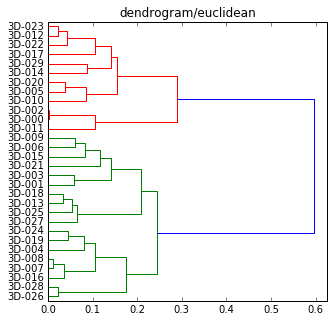

In [4]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline
def plot_dendrogram(df,metric="euclidean"):
    index = df.index
    print(index)
    print("df.shape",df.shape)
    pairdistance = pdist(df.as_matrix(),metric=metric)
    print("pairdistance.shape",pairdistance.shape)
    """
    =df.shape[0]*(df.shape[0]-1)
    """
    Z = linkage(pairdistance, metric=metric, method="average")
    plt.figure(figsize=(5,5),dpi=150)
    plt.title("dendrogram"+"/"+metric)
    den=dendrogram(Z,orientation="right",distance_sort='descending',labels=index)
    plt.show()
plot_dendrogram(df_small)

# 近い構造
* 0,2 : graphite , 11 : layered structure
* 1,3 : diamond, hexagonaldiamond
* 7,8 : ?

* 5 crossed graphene->20->10->14,29


![carbon 8 structures](../image/400.1000.Maeda2017.fig3.png)
ref.
Makito Takagi, Tetsuya Taketsugu, Hiori Kino, Yoshitaka Tateyama, Kiyoyuki Terakura, and Satoshi Maeda,
"Global search for low-lying crystal structures using the artificial force induced reaction method: A case study on carbon",
Phys. Rev. B 95, 184110, (2017)